# Image Denoising
***
An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

### Importing the Libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

### Load the Dataset

In [32]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print('Train Data Shape: {}'.format(x_train.shape))
print('Test Data Shape: {}'.format(x_test.shape))

Train Data Shape: (60000, 28, 28, 1)
Test Data Shape: (10000, 28, 28, 1)


### Adding Noise to the Image

In [33]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

### Viewing Noisy Images

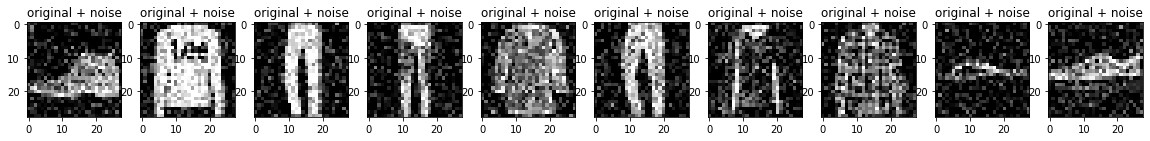

In [34]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Image Denoising Autoencoder 

In [42]:
class Denoise(Model):
  '''class for removing noise in images with autoencoder'''

  def __init__(self):
    '''class constructor'''
    
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape = (28, 28, 1)),
      layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', 
                    padding = 'same', strides = 2),
      layers.Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', 
                    padding = 'same', strides = 2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(filters = 8, kernel_size = 3, strides = 2, 
                             activation = 'relu', padding = 'same'),
      layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, 
                             activation = 'relu', padding = 'same'),
      layers.Conv2D(filters = 1, kernel_size = (3, 3), activation ='sigmoid', 
                    padding = 'same')])

  def call(self, x):
    '''builds autoencoder architecture based on convolutional neural networks'''
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Training the Model with the Data

In [43]:
autoencoder.fit(x_train_noisy, x_train, epochs = 10,
                shuffle = True, validation_data = (x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0156 - val_loss: 0.0093
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.006

### Viewing Encoder and Decoder Dimensions

In [37]:
autoencoder.encoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [40]:
autoencoder.decoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


### Viewing the reconstructed images

In [45]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

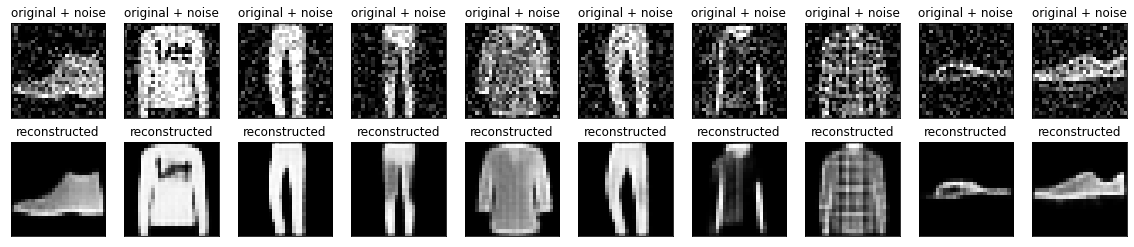

In [46]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()